# Urban canyon study

This example shows the behavior of sparrowpy in the simulation of an urban canyon under different simulation conditions

In [15]:
"""Test the radiosity.Radiosity module."""
import pyfar as pf
import sparrowpy as sp
import matplotlib.pyplot as plt
from run_simu import run_simu, run_simu_mem
import time
import json

%load_ext memory_profiler

%matplotlib inline
# %matplotlib ipympl

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


Lets define our room and source position.

In [16]:
def urban_canyon_stub(length_x, length_y, length_z):
    """Create a shoebox room with the given dimensions.

    Parameters
    ----------
    length_x : float
        Length of the urban canyon in meters.
    length_y : float
        width of the urban canyon in meters.
    length_z : float
        height of the urban canyon in meters.

    Returns
    -------
    room : list[geo.Polygon]
        List of the walls of the room.

    """
    return [
        sp.geometry.Polygon(
            [[0, 0, 0], [length_x, 0, 0],
            [length_x, 0, length_z], [0, 0, length_z]],
            [0, 0, 1], [0, 1, 0]),
        sp.geometry.Polygon(
            [[0, 0, 0],[0, length_y, 0],
            [length_x, length_y, 0], [length_x, 0, 0 ]],
            [1, 0, 0], [0, 0, 1]),
        sp.geometry.Polygon(
            [[0, length_y, 0], [length_x, length_y, 0],
            [length_x, length_y, length_z], [0, length_y, length_z]],
            [0, 0, 1], [0, -1, 0]),
        ]

In [17]:
# Define parameters
X = 90
Y = 12
Z = 6

# create geometry
canyon = urban_canyon_stub(X, Y, Z)
source = pf.Coordinates(30, 6, 1)
receiver = pf.Coordinates(90, 9, 2)

In [18]:
run_simu(walls=urban_canyon_stub(1,1,1),
        source=pf.Coordinates(.5,.5,.5),
        receiver=pf.Coordinates(.5,.5,.5),
        patch_size=1)

TimeData:
(1, 1) channels with 5 samples

### run simulation

In [19]:
time_steps = [1/50,1/100,1/250,1/500,1/1000]
patch_sizes = [6,3]#,2,1.5]
refl_orders = [1,20,40,60,80,100]
angl_res =[180,60,30,15,6]

In [20]:
# baseline
pss = 6
refll = 40
tss=1/100
angg=30

out={"baseline":{"patch_size":[],
                 "reflection_order":[],
                 "time_step":[],
                 "brdf_resolution":[]},
     "reflection_order":{"mem":[],
                  "t":[],
                  "edc":[],
                  "data":[]},
     "brdf_resolution":{"mem":[],
                  "t":[],
                  "edc":[],
                  "data":[]},
     "patch_size":{"mem":[],
                  "t":[],
                  "edc":[],
                  "data":[]},
     "time_step":{"mem":[],
                  "t":[],
                  "edc":[],
                  "data":[]},
                  }

out["baseline"]["patch_size"]=pss

out["baseline"]["reflection_order"]=refll

out["baseline"]["time_step"]=tss

out["baseline"]["brdf_resolution"]=angg

In [ ]:
# time stepping

for ts in time_steps:
    t0 = time.time()
    edc = run_simu( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=ts, duration=1.2,
                    refl_order=refll, res=angg)
    out["time_step"]["edc"]=edc.time.tolist()
    out["time_step"]["t"] = time.time()-t0
out["time_step"]["data"]=time_steps


In [8]:
# reflection order

for refl in refl_orders:
    t0 = time.time()
    edc = run_simu( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=tss, duration=1.2,
                    refl_order=refl, res=angg)
    out["reflection_order"]["edc"]=edc.time.tolist()
    out["reflection_order"]["t"] = time.time()-t0
out["reflection_order"]["data"]=refl_orders



In [9]:
# angular resolution

for ang in angl_res:
    t0 = time.time()
    edc = run_simu( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=tss, duration=1.2,
                    refl_order=refll, res=ang)
    out["brdf_resolution"]["edc"]=edc.time.tolist()
    out["brdf_resolution"]["t"] = time.time()-t0
out["brdf_resolution"]["data"]=angl_res

In [10]:
with open('resources/urban_canyon_nops.json', 'w') as fp:
    json.dump(out, fp)

In [11]:
# patch sizes

for pat in patch_sizes:
    t0 = time.time()
    edc = run_simu( walls=canyon, source=source,
                    receiver=receiver, patch_size=pat,
                    time_step=tss, duration=1.2,
                    refl_order=refll, res=angg )
    out["patch_size"]["edc"] = edc.time.tolist()
    out["patch_size"]["t"] = time.time()-t0
out["patch_size"]["data"]=patch_sizes


In [12]:
with open('resources/urban_canyon_no_mem.json', 'w') as fp:
    json.dump(out, fp)

In [ ]:
# memory
for ts in time_steps:
    out["time_step"]["mem"] = run_simu_mem( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=ts, duration=1.2,
                    refl_order=refll, res=angg)
for refl in refl_orders:
    out["reflection_order"]["mem"] = run_simu_mem( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=tss, duration=1.2,
                    refl_order=refl, res=angg)
for ang in angl_res:
    out["brdf_resolution"]["mem"] = run_simu_mem( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=tss, duration=1.2,
                    refl_order=refll, res=ang)
for pat in patch_sizes:
    out["patch_size"]["mem"] = run_simu_mem( walls=canyon, source=source,
                    receiver=receiver, patch_size=pat,
                    time_step=tss, duration=1.2,
                    refl_order=refll, res=angg)

d:\Joao_Fatela\dev\sparrowpy\examples\run_simu.py:18: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.equal_angle.'
  samples = pf.samplings.sph_equal_angle(delta_angles=res)
d:\Joao_Fatela\dev\sparrowpy\examples\run_simu.py:35: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


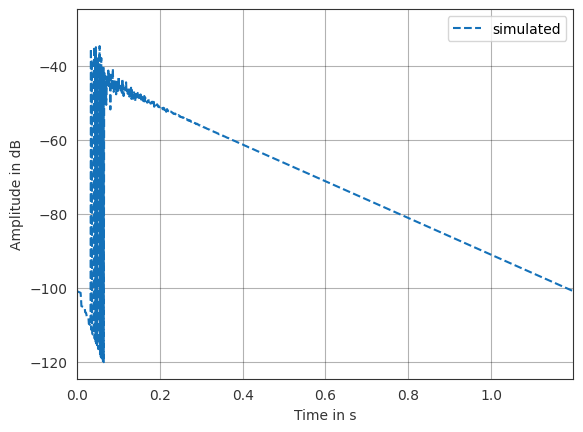

In [ ]:
with open('resources/urban_canyon_with_mem.json', 'w') as fp:
    json.dump(out, fp)

If the order would be increased, this would match even after 0.5s.


In [ ]:
%load_ext watermark
%watermark -v -m -iv

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 9.1.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 25 Model 68 Stepping 1, AuthenticAMD
CPU cores   : 16
Architecture: 64bit

pyfar     : 0.7.2
matplotlib: 3.10.1
sparrowpy : 0.1.0

